<a href="https://colab.research.google.com/github/ashutosh-sharma-xi/Rossman-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
# Mount the Drive with Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# installing category_encoders module as it is not by default present in colaboratory
%pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 545 kB/s 


In [ ]:
# Import some important Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import BinaryEncoder 
import warnings

In [ ]:
# To Ignore unnecessary Warnings 
warnings.filterwarnings("ignore")

In [ ]:
ross = "/content/drive/MyDrive/AlmaBetter /Capstone Project/Regression Capstone Project/Rossmann Stores Data.csv"
df_sales = "/content/drive/MyDrive/AlmaBetter /Capstone Project/Regression Capstone Project/store.csv"

# **Understanding Data**

In [ ]:
# reading the CSV Files 
df_ross = pd.read_csv(ross)
df_sales = pd.read_csv(df_sales)

In [ ]:
df_ross.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df_sales.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df_sales

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
df_ross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
df_ross.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df_sales.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# **Merging both Ross and Sales DataFrame and working on them**

In [ ]:
df = df_ross.merge(df_sales, on='Store', how='left')

In [ ]:
plt.boxplot(df['CompetitionDistance'])

# **Understanding merged dataset**

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Store: [   1    2    3 ... 1113 1114 1115]
DayOfWeek: [5 4 3 2 1 7 6]
Date: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-05-28'
 '2015-05-27' '2015-05-26' '2015-05-25' '2015-05-24' '2015-05-23'


In [ ]:
# Counting the Total Null Values in the New DataFrame
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [ ]:
# total Null value percentage
f.isnull().sum()/len(df)*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
dtype: float64

In [ ]:
len(df)

1017209

In [ ]:
# seeking for the Distribution of the data
df.describe() 

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

# **EDA (Exploratory Data Analysis)**

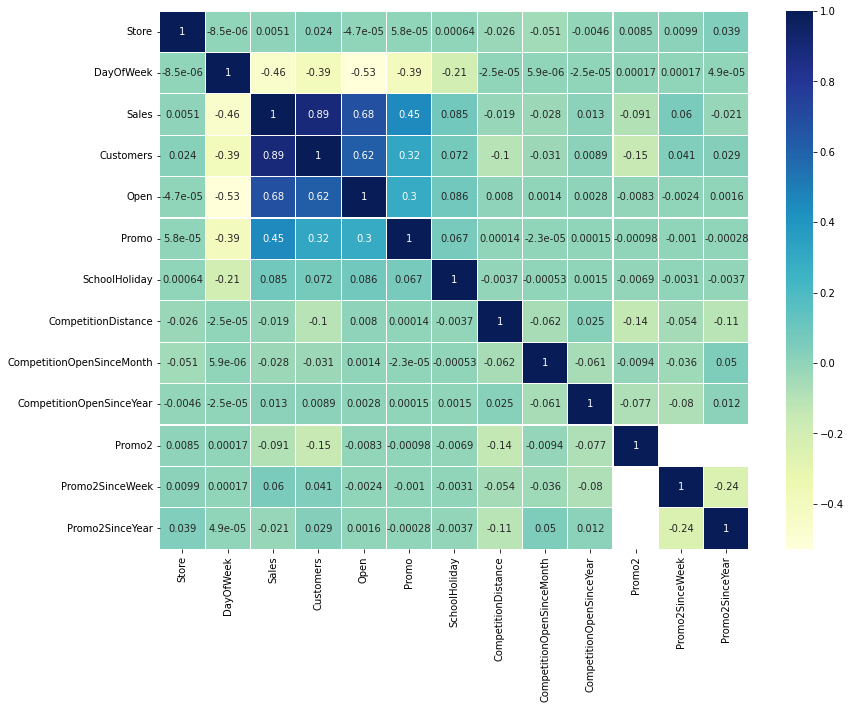

In [ ]:
#plotting Corelation heatmap
f, ax = plt.subplots(figsize=(13.2, 9.9))
ax = sns.heatmap(df.corr(),cmap='YlGnBu', linewidth = .2, annot = True)

* Columns like Customer, Open, Promo Shows nice correlation with Target Variable.
* Features like DayOfWeek, Promo2 does not have significant effect on Sales feature.
* Multicollinearity can be seen in Promo2, Promo2SinceWeek, Promo2SinceYear  


##Que1: on which day the cumulative sales were highest?##

In [ ]:
day_sale = df.groupby(df['DayOfWeek']).sum('Sales')['Sales']
#groupby on dayofweek and summing the sales 
print(day_sale)

DayOfWeek
1    1130203012
2    1020411930
3     954962863
4     911177709
5     980555941
6     846317735
7      29551433
Name: Sales, dtype: int64

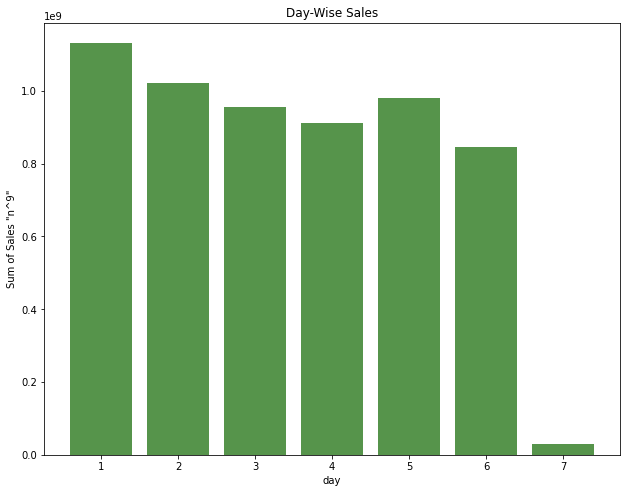

In [ ]:

# plot the Bargraph for above data
fig = plt.figure( figsize = (8,6))
ax = fig.add_axes([0,0,1,1])
plt.title('Day-Wise Sales')
plt.xlabel('Day')
plt.ylabel('Sum of Sales "n^9"')
days = day_sale.index
sales = day_sale.values
ax.bar(days,sales,color = '#56944b' )
plt.show()

### **key_points:** 
* It canbe seen here that on day 1 Generally people likes to buy something. This 1 Can be the weekend ie Sunday. 
* On Other days also the Sales is not very highly variable
* Day 7 is the worst day according to people's preference for Shopping 

## Que2: Comparing Data distribution of various columns

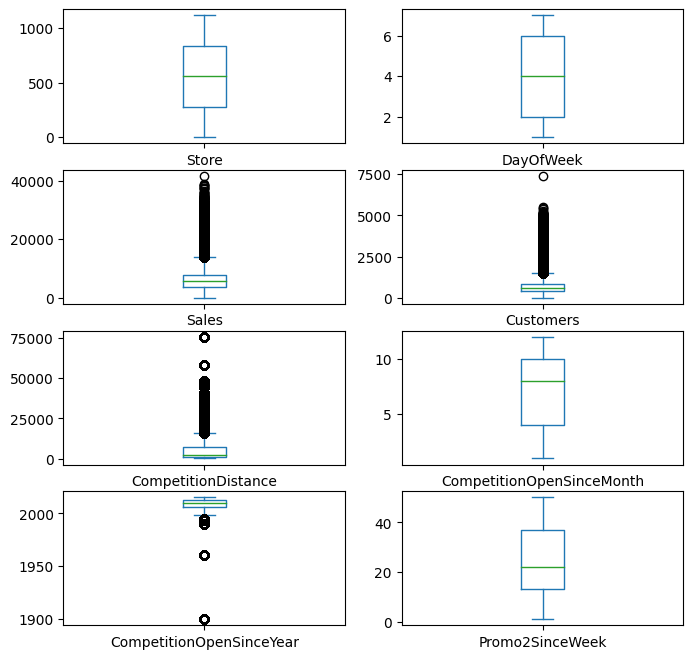

In [ ]:
nrow=4
ncol=2

df_list = [df['Store'],df['DayOfWeek'] ,df['Sales'] ,df['Customers'] ,df['CompetitionDistance'],
           df['CompetitionOpenSinceMonth'] ,df['CompetitionOpenSinceYear'] ,df['Promo2SinceWeek']]

fig, axes = plt.subplots(nrow, ncol, figsize = (8,8))
# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(kind = 'box',ax=axes[r,c])
        count+=1

# Display the plot
plt.show()

**Conclusion:**
* Sales Feature shows high number of outliers
* CompetetionOpenSinceMonth shows high number of value in 8th month (August).
* CompetetionOpenSinceYear shows few values below 2000 but some very robust outliers are present as near 1900 and 1950
* Features as Customer and Competition Distance also have Outliers but other features shows good distribution.

## Que3: Distribution of competitor distance for all stores

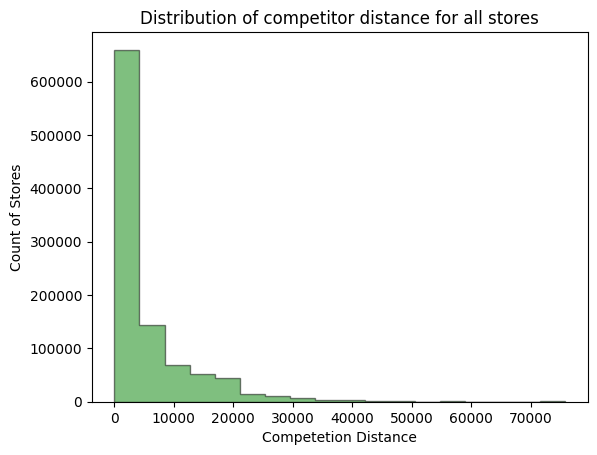

In [ ]:
# bin_df.groupby(by = ['points_bin'])['points_bin'].count().plot(kind= 'bar')

plt.title('Distribution of competitor distance for all stores')
plt.xlabel('Competetion Distance')
plt.ylabel('Count of Stores')
plt.hist(df['CompetitionDistance'], bins=18, alpha=0.5,
         histtype='stepfilled', color='green',
         edgecolor='black')
plt.show()

**Conclusion:**
* Competetion Distance Shows a Pareto Distribution
* Competetion Distance among Stores lies between 0-70000 meters
* Mostly Competetion Distance Lies between 0-10000



## Que4: What is the average sale per customer per StoreType?

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# create a empty dataframe to store total store-wise sales and average sales per customer.
Customer_sales = pd.DataFrame(columns = ['Store','Total_Count', 'Total_sales','Total_Customer','Avg_sale_per_customer'])

# iterate through all store_type and fetch total sales, total customer and average sale per customer 
for store_val in df.StoreType.unique():
    store_val_data =  df.loc[df['StoreType'] == store_val][['Sales', 'Customers']].sum()
    temp_df = pd.DataFrame({'Store':[store_val], 
                            'Total_Count':[int(df['StoreType'].loc[df['StoreType'] == store_val].value_counts())],
                            'Total_sales':[store_val_data['Sales']],
                            'Total_Customer':[store_val_data['Customers']],
                            'Avg_sale_per_customer':[round(store_val_data['Sales']/store_val_data['Customers'],2)]})
    # add new row to Customer_sales
    Customer_sales = pd.concat([Customer_sales,temp_df], ignore_index = True)

In [ ]:
Customer_sales

,Store,Total_Count,Total_sales,Total_Customer,Avg_sale_per_customer
0,c,136840,783221426,92129705,8.50
1,a,551627,3165334859,363541434,8.71
2,d,312912,1765392943,156904995,11.25
3,b,15830,159231395,31465621,5.06


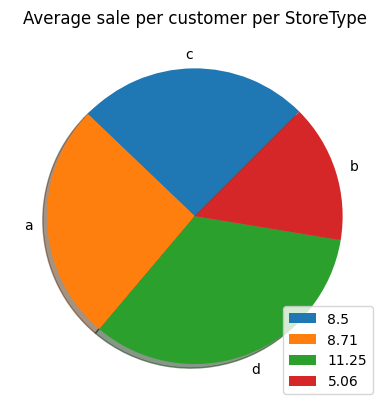

In [ ]:
# Plot a pie chart to see average sale per customer type
plt.title('Average sale per customer per StoreType')
labels = Customer_sales.Store
mycolors = ["black", "hotpink", "b", "#4CAF50"]

# plot a pie
plt.pie(Customer_sales.Avg_sale_per_customer,  labels = labels, shadow = True, startangle = 45, colors = mycolors)
plt.legend(Customer_sales.Avg_sale_per_customer)
plt.show()

**Conclusion:**
* Highest Per Customer Sale is provided by Store D.
* Lowest Per customer sale is 5.06 through Store B.
* Store A and C shows similar sales per customer
* Company should Focus more on Store B as it shows low per customer sale value. 


## Que5: Monthly distribution for sales 

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
dates_year = pd.to_datetime(df['Date'])

# create an empty dataframe to store time_series Sales Data
temp_df2 = pd.DataFrame()
temp_df2['Sales']  = df['Sales'] 

# get new year and month columns in dataframe
temp_df2['year'] = dates.apply(lambda x: x.year)
temp_df2['month'] = dates.apply(lambda x: x.month)
temp_df2['month_year'] = pd.to_datetime(dates.apply(lambda x: f'{x.month}-{x.year}'))

In [ ]:
# group by the months all over the year
temp_df3 = temp_df2.groupby('month_year').sum().sort_values(['month_year']) 

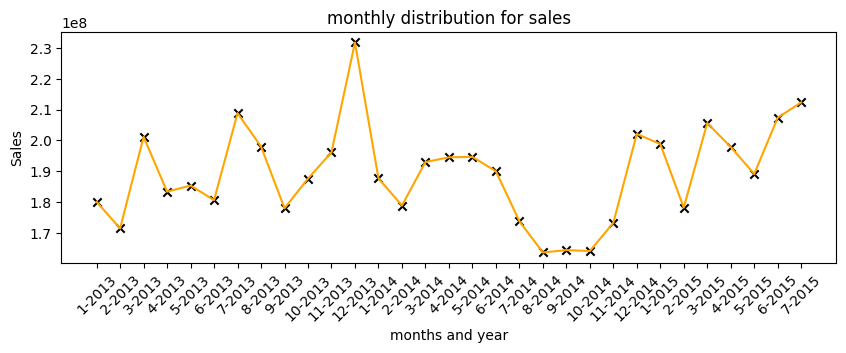

In [ ]:
# plot a line graph
x = np.array([f'{idx.month}-{idx.year}' for idx in temp_df3.index])

plt.figure(figsize = (10,3))
plt.plot(x, temp_df3.Sales, color = 'orange')
plt.scatter(x, temp_df3.Sales,marker = 'x', color = 'black')
plt.xlabel("months and year")  # add X-axis label
plt.ylabel("Sales")  # add Y-axis label
plt.xticks(x ,rotation = 45)
plt.title("monthly distribution for sales")  # add title
plt.show()

### **Conclusion**
* Non Stationary Data can be seen for Monthly Sales distribution.
* ovember 2013 was showing highest number of Sale overall.
* Monthly Sales of the Drugs may depend upon multiple other factors as it shows high variance


## Que6: Anova analysis for sales over assortment

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


A one-way ANOVA has the below given null and alternative hypotheses:

H0 (null hypothesis): μ1 = μ2 = μ3; The means of all the Sales of all assortment are equal   
H1 (null hypothesis): There will be at least one assortment type whose mean Sales differs from the rest

In [ ]:
# create distinct series for all different assortment types
asortment_a = df[df['StoreType'] == 'a']['Sales']
asortment_b = df[df['StoreType'] == 'b']['Sales']
asortment_c = df[df['StoreType'] == 'c']['Sales']

In [ ]:
# Applying anova from scipy.stats
from scipy.stats import f_oneway
print(df['StoreType'].value_counts(),'\n')
print(f_oneway(asortment_a,asortment_b,asortment_c))

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64 

F_onewayResult(statistic=9256.967502400194, pvalue=0.0)


**Conclusion: The F statistic and p-value turn out to be equal to *9256.96* and 0.0 respectively. 
Since the p-value is less than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the performance among sales of various assortment types**

# **Feature Engineering**

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df.shape

(1017209, 18)

In [ ]:
# lets see the pearson corelation of each column and how it affect Sales 
df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155


Few columns high effect the target variable, and multicolinearity is also present

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
 # Promo2SinceWeek and Promo2SinceYear have aroud 50% null value. replacing those values with zero
df['Promo2SinceWeek'] = np.where(df['Promo2SinceWeek'].isna() == True, 0, df['Promo2SinceWeek'])
df['Promo2SinceYear'] = np.where(df['Promo2SinceYear'].isna() == True, 0, df['Promo2SinceYear'])

df['CompetitionOpenSinceYear'] = np.where(df['CompetitionOpenSinceYear'].isna() == True, 0, df['CompetitionOpenSinceYear'])
df['CompetitionOpenSinceMonth'] = np.where(df['CompetitionOpenSinceMonth'].isna() == True, 0, df['CompetitionOpenSinceMonth'])

In [ ]:
# replacing null values of CompetitionDistance by their mean 
comp_dist_mean = df['CompetitionDistance'].mean()
df['CompetitionDistance'] = np.where(df['CompetitionDistance'].isna() == True,comp_dist_mean ,df['CompetitionDistance'])

In [ ]:
# label Encoding on PromoInterval
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
temp_promo = pd.DataFrame(le.fit_transform(df['PromoInterval']) , columns = ['PromoInterval'])
# adding   the encoded column to df
df['PromoInterval'] = temp_promo['PromoInterval']



In [ ]:
# making mixed data types to one common type(StateHoliday),  for which warning was arised
df['StateHoliday'] = np.where(df['StateHoliday'] == 0 , '0',df['StateHoliday'])


In [ ]:
#----------Binary Encoding----on StateHoliday

Be = BinaryEncoder()
df_Holiday = pd.DataFrame(Be.fit_transform(df[['StateHoliday']]))

df = df.merge(df_Holiday, on = df.index )
df.drop('StateHoliday',axis = 1,inplace = True)
df.rename(columns = {'StateHoliday_0':'public holiday','StateHoliday_1':'Easter holiday',
                     'StateHoliday_2':'Christmas holiday ' }, inplace = True)

In [ ]:
#-------Binary Encoding--------- on StoreType

df_StoreType = pd.DataFrame(Be.fit_transform(df[['StoreType']]))
df.drop('key_0',axis = 1, inplace = True)
df = df.reset_index(drop=True).merge(df_StoreType, on = df.index )
df.drop('StoreType',axis = 1,inplace = True)


In [ ]:
#--binary encoding--on Assortment

df_Assortment = pd.DataFrame(Be.fit_transform(df[['Assortment']]))

df.drop('key_0',axis = 1, inplace = True)
df = df.reset_index(drop=True).merge(df_Assortment, on = df.index )
df.drop('Assortment',axis = 1,inplace = True)


In [ ]:
# verify the datatype and count of null values of all columns
for c in df.columns:
    print(c, ': ',df[c].dtype, ': ',(df[c].isna() == True).sum() )

key_0 :  int64 :  0
Store :  int64 :  0
DayOfWeek :  int64 :  0
Date :  object :  0
Sales :  int64 :  0
Customers :  int64 :  0
Open :  int64 :  0
Promo :  int64 :  0
SchoolHoliday :  int64 :  0
CompetitionDistance :  float64 :  0
CompetitionOpenSinceMonth :  float64 :  0
CompetitionOpenSinceYear :  float64 :  0
Promo2 :  int64 :  0
Promo2SinceWeek :  float64 :  0
Promo2SinceYear :  float64 :  0
PromoInterval :  int32 :  0
public holiday :  int64 :  0
Easter holiday :  int64 :  0
Christmas holiday  :  int64 :  0
StoreType_0 :  int64 :  0
StoreType_1 :  int64 :  0
StoreType_2 :  int64 :  0
Assortment_0 :  int64 :  0
Assortment_1 :  int64 :  0


In [ ]:
# handling Date feature 
df['Date'] = pd.to_numeric(df.Date.str.replace('-',''))

In [ ]:
df.columns

Index(['key_0', 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'public holiday',
       'Easter holiday', 'Christmas holiday ', 'StoreType_0', 'StoreType_1',
       'StoreType_2', 'Assortment_0', 'Assortment_1'],
      dtype='object')

In [ ]:
### Applying Vif to handle Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df[[ 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'Promo', 'SchoolHoliday', 'Promo2', 'Promo2SinceWeek', 'public holiday',
       'Easter holiday', 'Christmas holiday ', 'StoreType_0', 'StoreType_1',
       'StoreType_2', 'Assortment_0', 'Assortment_1']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature         VIF
0                Store    1.007318
1            DayOfWeek    1.721571
2                 Date  514.886598
3                Sales    9.786515
4            Customers    9.664344
5                 Open    2.503731
6                Promo    1.443125
7        SchoolHoliday    1.095271
8               Promo2    2.431292
9      Promo2SinceWeek    2.384532
10      public holiday    1.926120
11      Easter holiday    4.384840
12  Christmas holiday     4.808236
13         StoreType_0    2.468508
14         StoreType_1    1.526559
15         StoreType_2    1.553359
16        Assortment_0   67.134926
17        Assortment_1   68.191673


Date columns shows high VIF value: 514 

In [ ]:
# it can be seen that Date shows very high VIF value, which needs to be removed..
df.drop('Date', axis = 1, inplace = True)

# assortment is also showing high vif but that is caused due to of encoding

<AxesSubplot: >

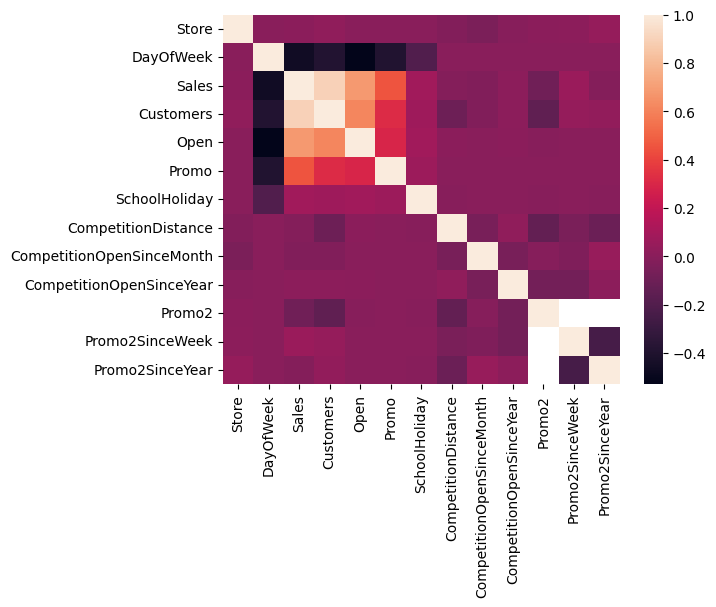

In [ ]:
# plot heatmap again to see the corelation
sns.heatmap(df.corr(), annot= True)

In [ ]:
df.head()

,key_0,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,public holiday,Easter holiday,Christmas holiday,StoreType_0,StoreType_1,StoreType_2,Assortment_0,Assortment_1
0,0,1,5,5263,555,1,1,1,1270.0,9.0,...,0.0,3,0,0,1,0,0,1,0,1
1,1,2,5,6064,625,1,1,1,570.0,11.0,...,2010.0,1,0,0,1,0,1,0,0,1
2,2,3,5,8314,821,1,1,1,14130.0,12.0,...,2011.0,1,0,0,1,0,1,0,0,1
3,3,4,5,13995,1498,1,1,1,620.0,9.0,...,0.0,3,0,0,1,0,0,1,1,0
4,4,5,5,4822,559,1,1,1,29910.0,4.0,...,0.0,3,0,0,1,0,1,0,0,1


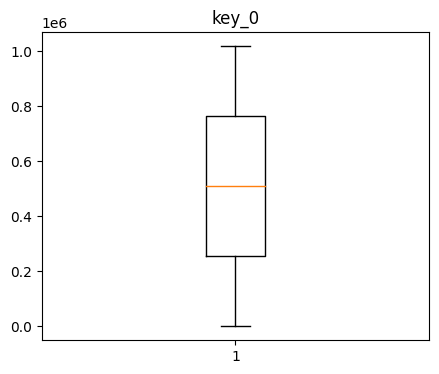

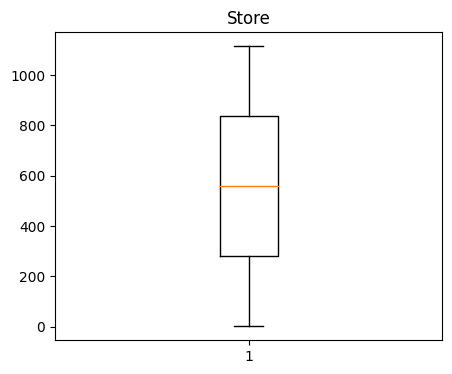

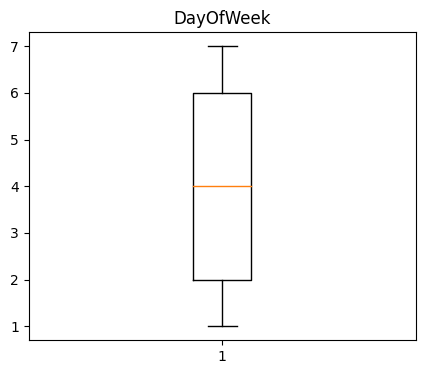

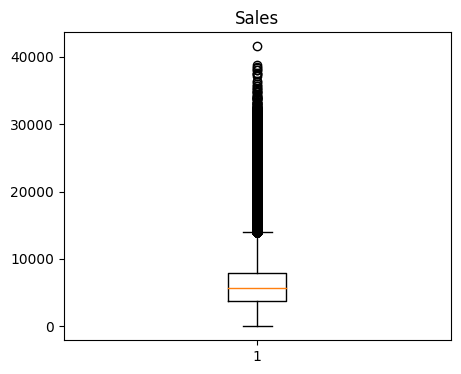

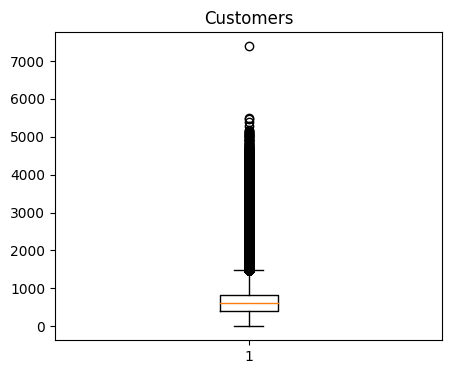

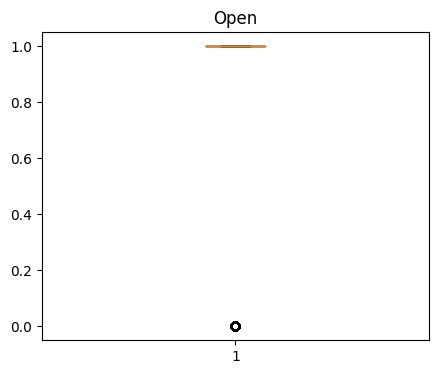

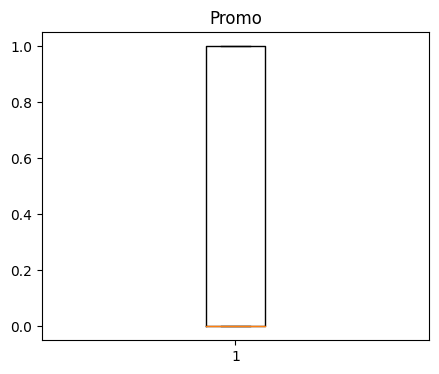

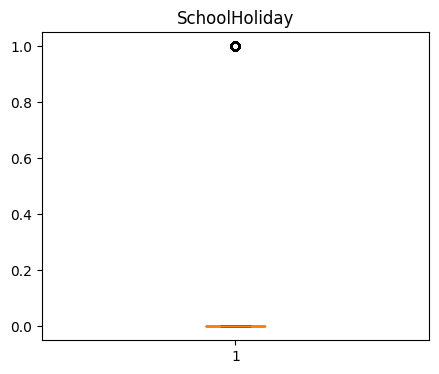

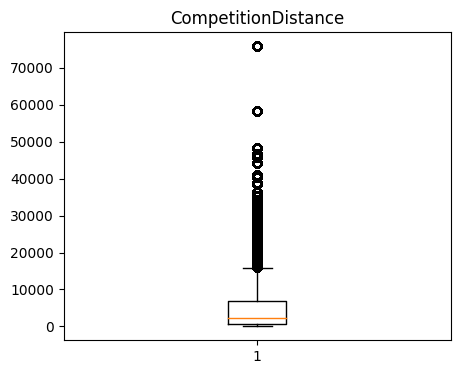

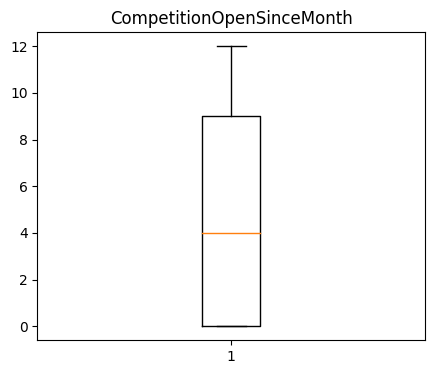

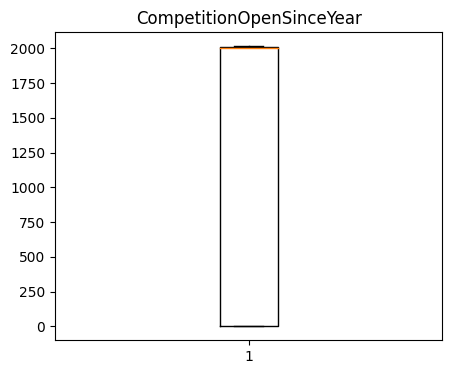

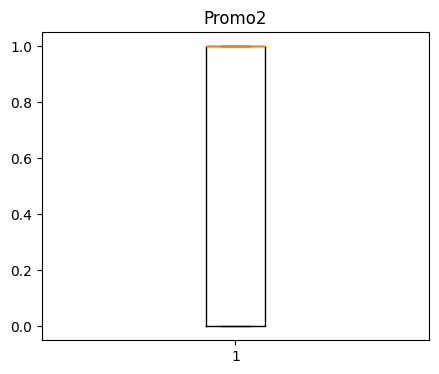

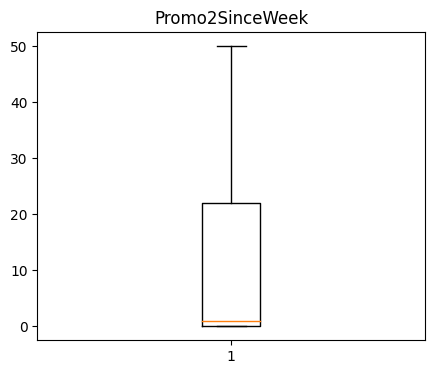

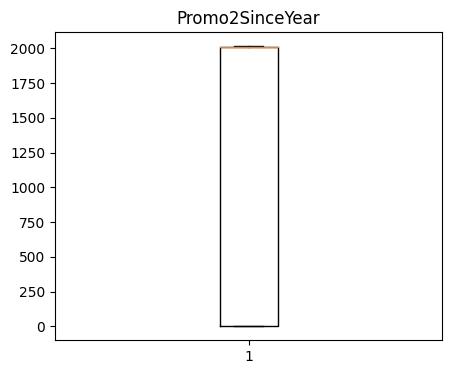

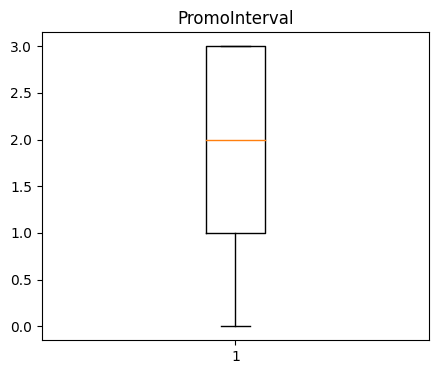

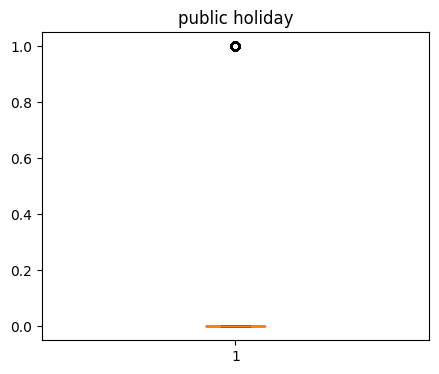

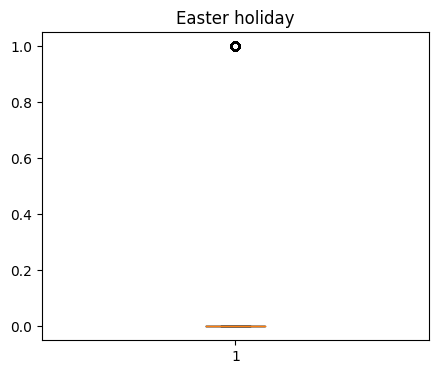

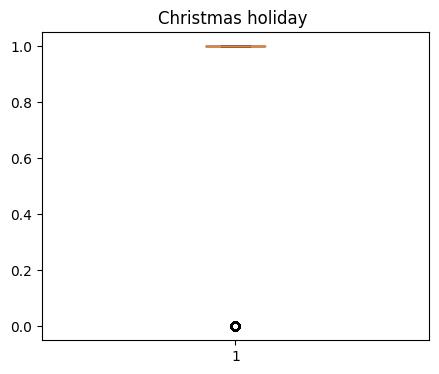

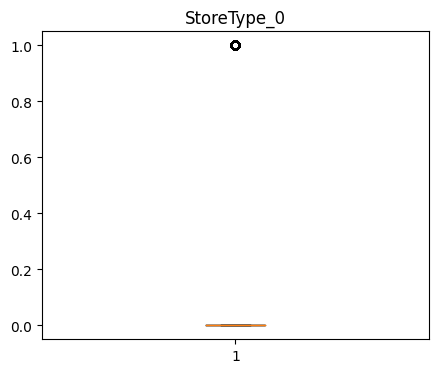

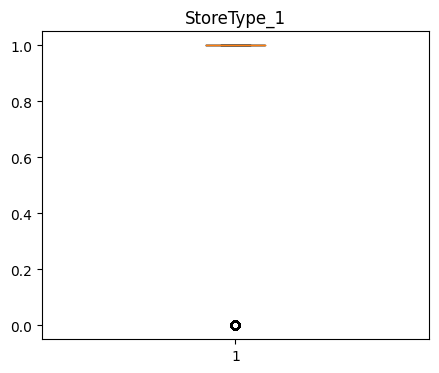

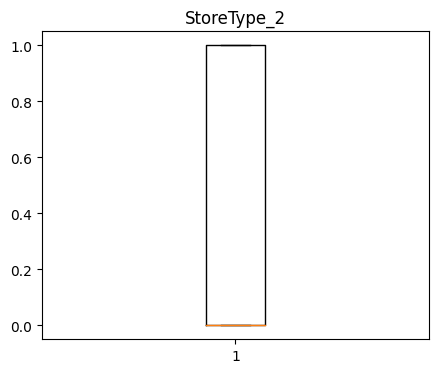

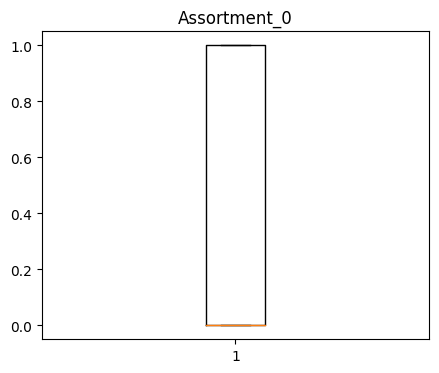

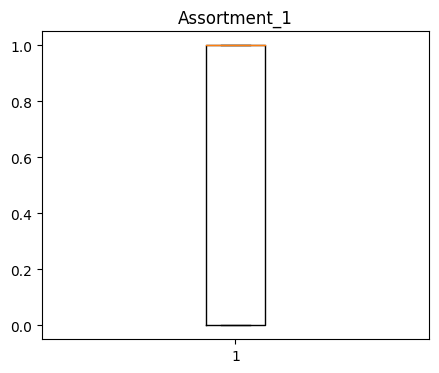

In [ ]:
# plotting boxplot to see distribution of data
for col in df.columns:
    fig = plt.figure(figsize =(5,4))
    
    
    # Creating plot
    plt.title(col)
    plt.boxplot(df[col])

    # show plot
    plt.show()

## Outlier detection and removal

In [ ]:

'''lets remove the outliers of dependent feature 'Sales' and we can
scale the independent features to reduce influence of outliers ''' 


# Outlier Detection 
# IQR
Q1 = np.percentile(df['Sales'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Sales'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['Sales'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Sales'] <= (Q1-1.5*IQR))
 
# Removing the Outliers 
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (1017209, 23)
New Shape:  (990515, 23)


# **Pre-Processing Data**

In [ ]:
# define independent and dependent variables
y = df["Sales"]
X = df.loc[:, df.columns != 'Sales']

In [ ]:
# scale the independent variables for better accuracy  
scale = MinMaxScaler()  
x_transformed = scale.fit_transform(X)  

In [ ]:
# split into 80-20 
x_train, x_test, y_train, y_test = train_test_split(x_transformed,y, test_size = 0.2, random_state = 0) 

# **Creating Models**

In [ ]:
# import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# creating a linear regression object and fitting data in that
regressor = LinearRegression()
regressor.fit(x_train, y_train) 

LinearRegression()

In [ ]:
# predict the test data
test_predicted = regressor.predict(x_test)

In [ ]:
# predict the train data
train_predicted = regressor.predict(x_train)

In [ ]:
# train set evaluation metrics

# Evaluating the model using MAE Evaluation Metric
print('mean absolute error: ',mean_absolute_error(y_train, train_predicted))

# Evaluating the model using MSE Evaluation Metric
print('mean squared error:  ',mean_squared_error(y_train, train_predicted))

# Evaluating the model using r_score Evaluation Metric
print('r2 score:            ',r2_score(y_train, train_predicted))

mean absolute error:  808.4440146226818
mean squared error:   1152556.092085986
r2 score:             0.8984537866140411


In [ ]:
# test set evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Evaluating the model using MAE Evaluation Metric
print('mean absolute error: ',mean_absolute_error(y_test, test_predicted))

# Evaluating the model using MSE Evaluation Metric
print('mean squared error:  ',mean_squared_error(y_test, test_predicted))

# Evaluating the model using r_score Evaluation Metric
print('r2 score:            ',r2_score(y_test, test_predicted))


mean absolute error:  812.5209134996526
mean squared error:   1168946.144105515
r2 score:             0.8967612991711944


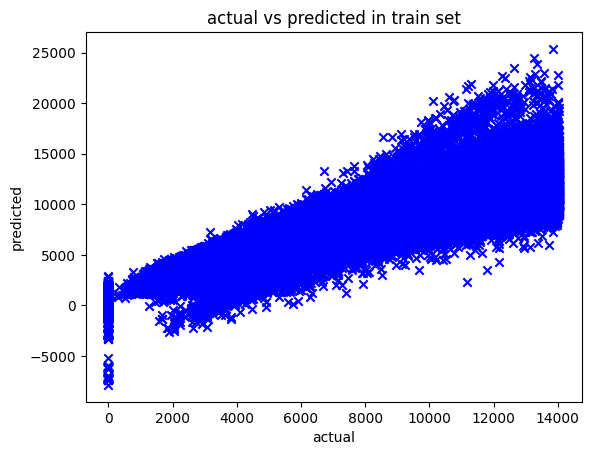

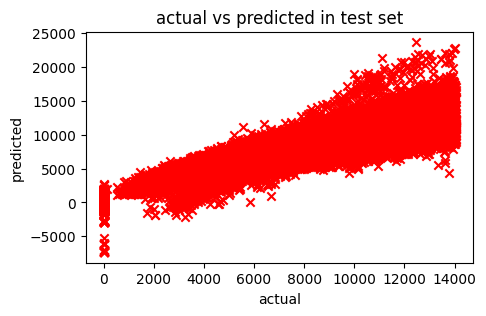

In [ ]:
# Plot for actual vs predicted in train set
plt.scatter(y_train, train_predicted,marker = 'x', color='blue')

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})

# Decorate
plt.title('actual vs predicted in train set')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

# Plot for actual vs predicted in test set
plt.scatter(y_test, test_predicted,marker = 'x', color='red')

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})

# Decorate
plt.title('actual vs predicted in test set')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

### Lets try some regularised models to achieve better accuracy

##### l2 regularisation | Ridge regression

In [ ]:
from sklearn.linear_model import RidgeCV

# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas,cv= 5, scoring='r2')
# fit the model with the best alpha
r_regressor = ridge_model.fit(x_train, y_train)

In [ ]:
# predict the test data
r_test_predicted = r_regressor.predict(x_test)

In [ ]:
# predict the train data
r_train_predicted = r_regressor.predict(x_train)

In [ ]:
# train set evaluation metrics (ridge)

# Evaluating the model using MAE Evaluation Metric
print('(ridge)mean absolute error: ',mean_absolute_error(y_train, r_train_predicted))

# Evaluating the model using MSE Evaluation Metric
print('(ridge)mean squared error:  ',mean_squared_error(y_train, r_train_predicted))

# Evaluating the model using r_score Evaluation Metric
print('(ridge)r2 score:            ',r2_score(y_train, r_train_predicted))

(ridge)mean absolute error:  809.3829810922011
(ridge)mean squared error:   1154376.5934725753
(ridge)r2 score:             0.8982933909304458


In [ ]:
# test set evaluation metrics (ridge)

# Evaluating the model using MAE Evaluation Metric
print('(ridge)mean absolute error: ',mean_absolute_error(y_test, r_test_predicted))

# Evaluating the model using MSE Evaluation Metric
print('(ridge)mean squared error:  ',mean_squared_error(y_test, r_test_predicted))

# Evaluating the model using r_score Evaluation Metric
print('(ridge)r2 score:            ',r2_score(y_test, r_test_predicted))

(ridge)mean absolute error:  813.5243039637103
(ridge)mean squared error:   1170940.7355289604
(ridge)r2 score:             0.8965851413316915


##### l1 regularisation | lasso regression

In [ ]:
from sklearn.linear_model import LassoCV

# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas as in 
lasso_model = LassoCV(alphas=r_alphas,cv = 5)
# fit the model with the best alpha
l_regressor = lasso_model.fit(x_train, y_train)

In [ ]:
# predict the test data
l_test_predicted = l_regressor.predict(x_test)

In [ ]:
# predict the train data
l_train_predicted = l_regressor.predict(x_train)

In [ ]:
# train set evaluation metrics (lasso)

# Evaluating the model using MAE Evaluation Metric
print('(lasso)mean absolute error: ',mean_absolute_error(y_train, l_train_predicted))

# Evaluating the model using MSE Evaluation Metric
print('(lasso)mean squared error:  ',mean_squared_error(y_train, l_train_predicted))

# Evaluating the model using r_score Evaluation Metric
print('(lasso)r2 score:            ',r2_score(y_train, l_train_predicted))

(lasso)mean absolute error:  810.0805843534202
(lasso)mean squared error:   1156645.7530121289
(lasso)r2 score:             0.8980934661195038


In [ ]:
# test set evaluation metrics (lasso)

# Evaluating the model using MAE Evaluation Metric
print('(lasso)mean absolute error: ',mean_absolute_error(y_test, l_test_predicted))

# Evaluating the model using MSE Evaluation Metric
print('(lasso)mean squared error:  ',mean_squared_error(y_test, l_test_predicted))

# Evaluating the model using r_score Evaluation Metric
print('(lasso)r2 score:            ',r2_score(y_test, l_test_predicted))

(lasso)mean absolute error:  814.3760970712781
(lasso)mean squared error:   1173761.7740501643
(lasso)r2 score:             0.896335993538711


### Out of 3 regression models, OLS seems to be the best for this dataset, lets tune the hyperparameter and achieve some better accuracy 
selecting n features for best model using GridSearchCV

In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 23))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)        

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
# best parameter of the model
model_cv.best_params_

{'n_features_to_select': 22}

In [ ]:
# best score of the model
model_cv.best_score_

0.8984453976422658

In [ ]:
# best estimater of the model
model_cv.best_estimator_

RFE(estimator=LinearRegression(), n_features_to_select=22)

here it can be seen that ordinary least square regression is giving the best accuracy. lasso and ridge doesn't seems out to be good enough in this case.
as to increase accuracy trying some other methods.

### Trying the Gradient boosting regressor for better predictions...

In [ ]:
# import the GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
params = {'n_estimators': 100 , 'max_depth' : 3,'learning_rate' : 1, 'criterion' : 'squared_error'  }
GBR_model = GradientBoostingRegressor(**params)

In [ ]:
GBR_model.fit(x_train, y_train )

GradientBoostingRegressor(criterion='squared_error', learning_rate=1)

In [ ]:
GBR_train_predicted = GBR_model.predict(x_train)

In [ ]:
GBR_test_predicted = GBR_model.predict(x_test)

In [ ]:
print('train accuracy of GBR is: ',GBR_model.score(x_train, y_train))
print('test accuracy of GBR is: ',GBR_model.score(x_test, y_test))

train accuracy of GBR is:  0.9614471916429663
test accuracy of GBR is:  0.9607887639442277


# **Conclusion**
* ### Some features were extremely important for the Prediction like Customer, Promo, Open etc
* ### As the Dataset was quiet large the model generalised well and chances of overfitting and underfitting reduced.  
* ### In order to earn more focus company should focus more on Store d which generates highest sales for the firm.   
* ### Gradient boosting regressor seems to be relatively very efficient with approx 96% of r2 score
* ### ordinary least square regression performed well with approx 89% accuracy in both train and test set, thus model wasn't loooking like high biased or high variance
* ### lasso and ridge didn't show any effective result in comparision to OLS 
* ### Company earns the most from Storetype d thus it must maintain this, and should focus more on low performing stores like store b.
* ###  On Sunday the market might gets close, resulting in Extremely less sales.
* ### The Data could also be used for Time Series Analytics but as the data is old of 2015, now it is very less likely for the firm to use this in future prediction.
* ### For around 0.65 million stores the competitor is present within a range of 5KM which shows a good competetion is  present in most of the cases but most of the competitors are established after year 2000. 

## THANK YOU


